<a href="https://colab.research.google.com/github/Arnav-Barman/UML501-ML/blob/main/Assignment8_ArnavBarman_3CO15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.svm import SVR
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [58]:
weather = pd.read_csv("/content/weather.csv")
boston = datasets.load_boston()
mall = pd.read_csv("/content/Mall_Customers.csv")
diabetes = pd.read_csv("/content/diabetes.csv")
cancer = pd.read_csv("/content/breast_cancer.csv")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

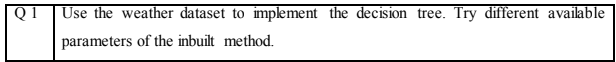

In [59]:
x = weather.iloc[:,0:4]
y = weather.iloc[:,4]

In [60]:
le = LabelEncoder()

In [61]:
x['Outlook'] = le.fit_transform(x['Outlook'])
x['Temp'] = le.fit_transform(x['Temp'])
x['Humidity'] = le.fit_transform(x['Humidity'])

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [63]:
clf = DecisionTreeClassifier()

In [64]:
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [65]:
y_pred = clf.predict(x_test)
y_pred

array([0, 1, 0, 1])

In [66]:
clf.score(x_test, y_test)

0.5

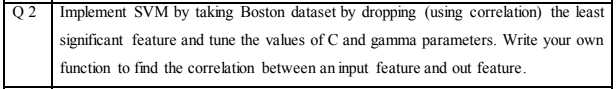

In [67]:
x = pd.DataFrame(boston["data"])
x.columns = boston["feature_names"]
y = pd.DataFrame(boston["target"])

In [68]:
boston_data = pd.concat([x, y])
boston_data.corr()

,0,AGE,B,CHAS,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,RM,TAX,ZN
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,NaN,1.000000,-0.273534,0.086518,0.352734,-0.747881,0.644779,0.602339,0.731470,0.261515,0.456022,-0.240265,0.506456,-0.569537
B,NaN,-0.273534,1.000000,0.048788,-0.385064,0.291512,-0.356977,-0.366087,-0.380051,-0.177383,-0.444413,0.128069,-0.441808,0.175520
CHAS,NaN,0.086518,0.048788,1.000000,-0.055892,-0.099176,0.062938,-0.053929,0.091203,-0.121515,-0.007368,0.091251,-0.035587,-0.042697
CRIM,NaN,0.352734,-0.385064,-0.055892,1.000000,-0.379670,0.406583,0.455621,0.420972,0.289946,0.625505,-0.219247,0.582764,-0.200469
DIS,NaN,-0.747881,0.291512,-0.099176,-0.379670,1.000000,-0.708027,-0.496996,-0.769230,-0.232471,-0.494588,0.205246,-0.534432,0.664408
INDUS,NaN,0.644779,-0.356977,0.062938,0.406583,-0.708027,1.000000,0.603800,0.763651,0.383248,0.595129,-0.391676,0.720760,-0.533828
LSTAT,NaN,0.602339,-0.366087,-0.053929,0.455621,-0.496996,0.603800,1.000000,0.590879,0.374044,0.488676,-0.613808,0.543993,-0.412995
NOX,NaN,0.731470,-0.380051,0.091203,0.420972,-0.769230,0.763651,0.590879,1.000000,0.188933,0.611441,-0.302188,0.668023,-0.516604
PTRATIO,NaN,0.261515,-0.177383,-0.121515,0.289946,-0.232471,0.383248,0.374044,0.188933,1.000000,0.464741,-0.355501,0.460853,-0.391679


In [69]:
scaler_1 = StandardScaler()
x = scaler_1.fit_transform(x)

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [71]:
kernel = ['linear', 'rbf', 'poly']
kernel_performance = []
for i in kernel:
    c_score = []
    for c in range(1, 100):
        model = SVR(C=c)
        model.fit(x_train, y_train)
        c_score.append((c,model.score(x_test, y_test)))
    kernel_performance.append((i, max(c_score, key=lambda item: item[1])))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [72]:
print(kernel_performance)

[('linear', (88, 0.7870574093945801)), ('rbf', (88, 0.7870574093945801)), ('poly', (88, 0.7870574093945801))]


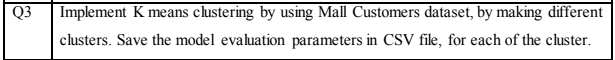

In [73]:
mall.corr()

,CustomerID,Age,Annual Income,Spending Score
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income,0.977548,-0.012398,1.000000,0.009903
Spending Score,0.013835,-0.327227,0.009903,1.000000


In [74]:
le = LabelEncoder()
mall["Gender"] = le.fit_transform(mall["Gender"])

In [75]:
mall.drop("CustomerID", axis=1, inplace=True)

In [76]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(mall)
    wcss.append(km.inertia_)

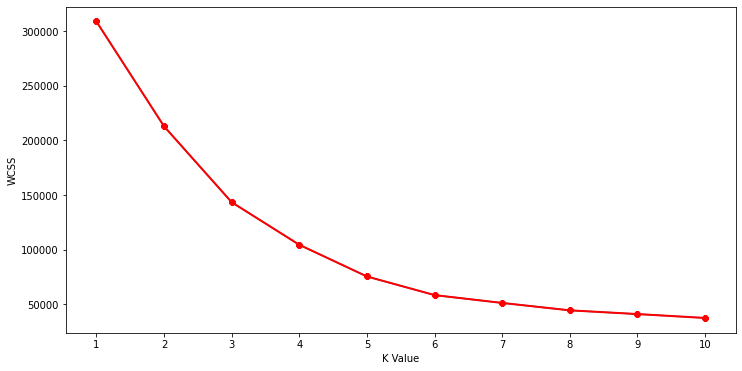

In [77]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [78]:
km1=KMeans(n_clusters=5)
km1.fit(mall)
y=km1.predict(mall)
mall["label"] = y

In [79]:
mall.head()

,Gender,Age,Annual Income,Spending Score,label
0,1,19,15,39,2
1,1,21,15,81,4
2,0,20,16,6,2
3,0,23,16,77,4
4,0,31,17,40,2


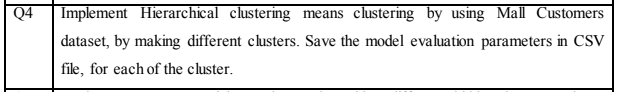

In [80]:
intervals = [15, 20, 30, 40, 50, 60, 70]
col = mall['Age']
mall['Age Groups'] = pd.cut(x=col, bins=intervals)
mall['Age Groups'] 

0      (15, 20]
1      (20, 30]
2      (15, 20]
3      (20, 30]
4      (30, 40]
         ...   
195    (30, 40]
196    (40, 50]
197    (30, 40]
198    (30, 40]
199    (20, 30]
Name: Age Groups, Length: 200, dtype: category
Categories (6, interval[int64, right]): [(15, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] <
                                         (60, 70]]

In [81]:
mall.head()

,Gender,Age,Annual Income,Spending Score,label,Age Groups
0,1,19,15,39,2,"(15, 20]"
1,1,21,15,81,4,"(20, 30]"
2,0,20,16,6,2,"(15, 20]"
3,0,23,16,77,4,"(20, 30]"
4,0,31,17,40,2,"(30, 40]"


In [82]:
mall = pd.get_dummies(mall)

In [83]:
mall.head()

,Gender,Age,Annual Income,Spending Score,label,"Age Groups_(15, 20]","Age Groups_(20, 30]","Age Groups_(30, 40]","Age Groups_(40, 50]","Age Groups_(50, 60]","Age Groups_(60, 70]"
0,1,19,15,39,2,1,0,0,0,0,0
1,1,21,15,81,4,0,1,0,0,0,0
2,0,20,16,6,2,1,0,0,0,0,0
3,0,23,16,77,4,0,1,0,0,0,0
4,0,31,17,40,2,0,0,1,0,0,0


In [84]:
mall.drop(["Age"], axis=1, inplace=True)

In [85]:
pca = PCA(n_components=10)
mall = pca.fit_transform(mall)

In [86]:
clustering_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
clustering_model.fit(mall)
y_pred = clustering_model.labels_

In [87]:
y_pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

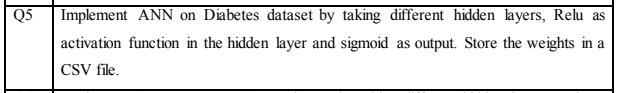

In [88]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [89]:
x = diabetes.iloc[:,0:8]
y = diabetes.iloc[:,8]

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [91]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [92]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [93]:
MLP = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=1000)
MLP.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

In [94]:
y_pred = MLP.predict(x_test)

In [95]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[104  26]
 [ 25  37]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       130
           1       0.59      0.60      0.59        62

    accuracy                           0.73       192
   macro avg       0.70      0.70      0.70       192
weighted avg       0.74      0.73      0.73       192



In [96]:
MLP.score(x_test, y_test)

0.734375

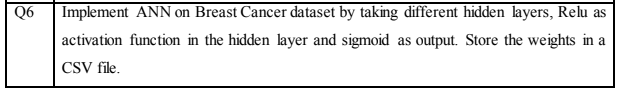

In [97]:
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [98]:
np.unique(cancer["diagnosis"])

array(['B', 'M'], dtype=object)

In [99]:
le = LabelEncoder()

In [100]:
x = cancer.drop(columns=["diagnosis"])

In [101]:
y = le.fit_transform(cancer.iloc[:,0])
y = pd.DataFrame(y)

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [103]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [104]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [105]:
MLP = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=1000)
MLP.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

In [106]:
y_pred = MLP.predict(x_test)

In [107]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[87  3]
 [ 4 49]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        90
           1       0.94      0.92      0.93        53

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



In [108]:
MLP.score(x_test, y_test)

0.951048951048951